# Imports

In [1]:
import pandas as pd 

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import pickle

## Get Data

In [2]:
df = pd.read_excel('data/MSFT_linkedin_processed.xlsx', parse_dates=['Date'], index_col=0)
df.head()

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,21220800,1.549141,UP
2016-12-09,61.180000,61.990002,61.130001,61.970001,27349400,0.321694,UP
2016-12-12,61.820000,62.299999,61.720001,62.169998,20198100,1.286125,UP
2016-12-13,62.500000,63.419998,62.240002,62.980000,35718900,-0.478620,DOWN
2016-12-14,63.000000,63.450001,62.529999,62.680000,30352700,-0.159793,DOWN


## ML Model

In [3]:
# Define feature and target

target = df.change_tomorrow_direction

features = df.drop(columns=['change_tomorrow', 'change_tomorrow_direction'])

Compute Model

In [12]:
# Call model
model_dt = DecisionTreeClassifier(max_depth=15)

# Fit the model

model_dt.fit(X=features, y=target)

DecisionTreeClassifier(max_depth=15)

Visualize the Model

[Text(0.5161362042999584, 0.96875, 'Close <= 233.525\ngini = 0.497\nsamples = 1766\nvalue = [818, 948]'),
 Text(0.36881686227669297, 0.90625, 'Volume <= 46663750.0\ngini = 0.492\nsamples = 1074\nvalue = [467, 607]'),
 Text(0.23327144786040716, 0.84375, 'Volume <= 32050200.0\ngini = 0.488\nsamples = 965\nvalue = [407, 558]'),
 Text(0.10398057748234317, 0.78125, 'Volume <= 31751600.0\ngini = 0.495\nsamples = 759\nvalue = [342, 417]'),
 Text(0.10065693809721646, 0.71875, 'High <= 65.195\ngini = 0.494\nsamples = 753\nvalue = [336, 417]'),
 Text(0.03365184877440797, 0.65625, 'Close <= 64.45\ngini = 0.485\nsamples = 58\nvalue = [34, 24]'),
 Text(0.024096385542168676, 0.59375, 'Low <= 63.43\ngini = 0.498\nsamples = 43\nvalue = [20, 23]'),
 Text(0.014956377233070212, 0.53125, 'Open <= 62.27\ngini = 0.489\nsamples = 33\nvalue = [19, 14]'),
 Text(0.011632737847943497, 0.46875, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.018280016618196927, 0.46875, 'Volume <= 19007650.0\ngini = 0.436\nsa

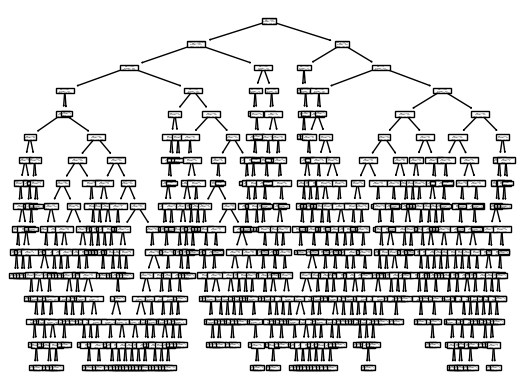

In [13]:
plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_)

Calculate predictions

In [14]:
y_pred = model_dt.predict(X=features)

df_predictions = df[['change_tomorrow_direction']].copy()
df_predictions['prediction'] = y_pred

df_predictions

,change_tomorrow_direction,prediction
Date,,
2016-12-08,UP,UP
2016-12-09,UP,UP
2016-12-12,UP,UP
2016-12-13,DOWN,DOWN
2016-12-14,DOWN,DOWN
...,...,...
2023-12-08,DOWN,DOWN
2023-12-11,UP,DOWN
2023-12-12,DOWN,DOWN


Evaluate model

In [15]:
comp = df_predictions.change_tomorrow_direction == df_predictions.prediction

comp.sum() / len(comp) # Ratio - Accuracy

0.8652321630804077

In [16]:
model_dt.score(X=features, y=target)

0.8652321630804077

Save the model in to a file

In [17]:
with open('models/model_dt_classification.pkl', 'wb') as f:
    pickle.dump(model_dt, f)